In [8]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
class Experiment():
    def __init__(self,unit_to_ev_inverse,v_sense,V0,R1_unconverted,R2_unconverted):
        self.unit_to_ev_inverse = unit_to_ev_inverse
        self.v_sense = v_sense
        self.V0 = V0
        self.R1_unconverted = R1_unconverted
        self.R2_unconverted = R2_unconverted
        self.R1 = self.R1_unconverted * self.unit_to_ev_inverse
        self.R2 = self.R2_unconverted * self.unit_to_ev_inverse

    def Delta_V(self,epsilon,m):
        param = (epsilon**2)/m
        numerator = self.R1_unconverted*np.sinh(m*self.R2) - self.R2_unconverted*np.sinh(m*self.R1)
        denominator = self.R1_unconverted*self.R2*np.exp(m*self.R2) + param*self.R1_unconverted*np.sinh(m*self.R2)
        return self.V0*param*numerator/denominator
    
    def evaluate_Delta_V(self,epsilon_list,m_list):
        number_of_epsilon=np.size(epsilon_list)
        number_of_m = np.size(m_list)
        Delta_V_evaluated = np.zeros(shape=(number_of_epsilon,number_of_m))
        for (i,m) in enumerate(m_list):
            for (j,epsilon) in enumerate(epsilon_list):
                Delta_V_evaluated[i][j] = self.Delta_V(epsilon,m)
        return Delta_V_evaluated
    
    def get_Delta_V_possible(self,epsilon_list,m_list):
        Delta_V_evaluated = self.evaluate_Delta_V(epsilon_list,m_list)
        Delta_V_possible = (Delta_V_evaluated < self.v_sense)
        return Delta_V_possible

In [10]:
Pimpton = Experiment(unit_to_ev_inverse=1544855.50049, v_sense=10**(-6), V0=3000, R1_unconverted=2, R2_unconverted=2.5)
Bartlett = Experiment(unit_to_ev_inverse=50684, v_sense=0.3*(10**-9), V0= 40000, R1_unconverted=38, R2_unconverted=46)

In [11]:
number_of_epsilon = 2000
number_of_m = 2000
epsilon_list = np.logspace(-10,2,number_of_epsilon) #this is the base 10 exponent range
m_list = np.logspace(-13,-4,number_of_m)

In [12]:
Pimpton_possible = Pimpton.get_Delta_V_possible(epsilon_list,m_list)

In [13]:
Bartlett_possible = Bartlett.get_Delta_V_possible(epsilon_list,m_list)

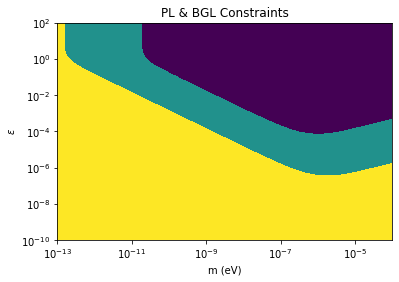

In [14]:
plt.figure()
plt.pcolormesh(m_list,epsilon_list,Bartlett_possible.T.astype(int)+Pimpton_possible.T.astype(int))
#always need to plot transpose with color mesh
#convert boolean to 0 and 1 using astype
#when we add the two, value 0 = constrained by both, value 1 = constrained by 1 experiment
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$\epsilon$')
plt.xlabel('m (eV)')
plt.title("PL & BGL Constraints")
plt.savefig("PL & BGL Constraints.png",dpi=500)

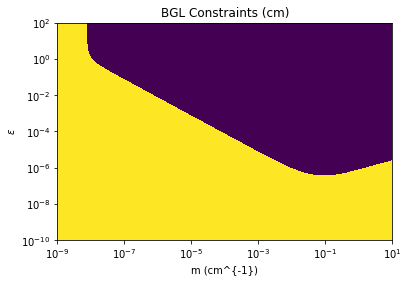

In [19]:
Bartlett_cm = Experiment(unit_to_ev_inverse=1, v_sense=0.3*(10**-9), V0= 40000, R1_unconverted=38, R2_unconverted=46)
number_of_epsilon = 2000
number_of_m = 2000
epsilon_list = np.logspace(-10,2,number_of_epsilon) #this is the base 10 exponent range
m_list = np.logspace(-9,1,number_of_m)
Bartlett_possible = Bartlett_cm.get_Delta_V_possible(epsilon_list,m_list)
plt.figure()
plt.pcolormesh(m_list,epsilon_list,Bartlett_possible.T.astype(int))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$\epsilon$')
plt.xlabel('m (cm^{-1})')
plt.title("BGL Constraints (cm)")
plt.savefig("BGL Constraints (cm).png",dpi=500)

In [58]:
B = Bartlett

In [75]:
def epsilon(m):
    #v_ratio = B.v_sense/B.V0
    v_ratio = 1
    B.R1_unconverted =1
    B.R2_unconverted=1
    numerator = (v_ratio*B.R1_unconverted*B.R2_unconverted*e**(m*B.R2_unconverted)*m)
    denominator = (B.R1_unconverted*np.sinh(m*B.R2_unconverted)-B.R2*np.sinh(m*B.R1_unconverted) - v_ratio*B.R1_unconverted*np.sinh(m*B.R2_unconverted))
    return np.sqrt(numerator/denominator)

C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


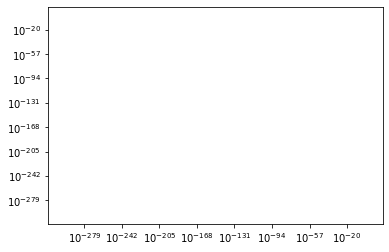

In [77]:
m_list = np.logspace(0,1,number_of_m)
plt.plot(m_list,epsilon(m_list))
#plt.plot(m_list,0.0000001*m_list**2)
plt.xscale("log")
plt.yscale("log")

In [40]:
m_list[-1]

100000.0

In [68]:
epsilon(10)

C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


inf

In [70]:
e**(100)

2.6881171418161212e+43

In [91]:
def f(m):
    numerator = e**(m)*m
    denominator = - np.sinh(m)
    return np.sqrt(numerator/denominator)

In [92]:
f(1)

2.718281828459045


C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


nan

In [94]:
e**(1)*1

2.718281828459045

In [95]:
np.sinh(1)

1.1752011936438014

In [96]:
e**(1)*1/np.sinh(1)

2.3130352854993315

In [125]:
R1 = 1
R2 = 3
def g(m):
    return R1*np.sinh(R2*m) - R2*np.sinh(R1*m)

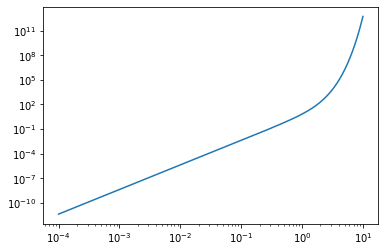

In [126]:
m_list = np.logspace(-4,1,number_of_m)
plt.plot(m_list,g(m_list))
plt.xscale('log')
plt.yscale('log')

In [135]:
m=0.0001
np.sinh(R1*m)/np.sinh(R2*m)

0.3333333288888889

In [128]:
R1

1

In [129]:
R2

3

In [130]:
g(0.1)

0.0040200433876105834

In [131]:
R1*np.sinh(R2*m)

0.30452029344714265

In [132]:
R2*np.sinh(R1*m)

0.30050025005953207